In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = w.wrangle_zillow(cached=False)

In [3]:
df.shape

(60241, 35)

In [ ]:
# (71807, 35)

In [5]:
df

,heating_system_type_id,bathrooms,bedrooms,prop_sqft,fips,fireplace_cnt,latitude,longitude,lot_sqft,pool_cnt,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,,,,,,,,,,,,,,,,,,,,,
10711855,2,2.0,3.0,2107.0,6037,0.0,0.342226,-1.186174,9158,1.0,...,1.227188,0.210239,0.2,0.5,118.488372,0.4,40.891461,0.3,0.666667,1
10711877,2,2.0,4.0,1882.0,6037,0.0,0.342203,-1.186164,9035,1.0,...,1.230895,0.207415,0.2,0.4,134.431456,0.4,45.047039,0.3,0.500000,1
10711888,2,2.0,4.0,1882.0,6037,0.0,0.342225,-1.186169,9800,0.0,...,1.229132,0.224977,0.2,0.4,136.870882,0.4,29.115510,0.3,0.500000,1
10711910,2,2.0,3.0,1477.0,6037,0.0,0.342219,-1.186157,11285,1.0,...,1.430790,0.259068,0.3,0.3,39.247123,0.1,1.777847,0.1,0.666667,1
10711923,2,2.0,4.0,1918.0,6037,0.0,0.342206,-1.186153,11239,1.0,...,1.261220,0.258012,0.3,0.4,87.522941,0.3,22.029540,0.3,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167636859,2,3.0,3.0,1850.0,6037,0.0,0.338716,-1.183562,6504,0.0,...,1.190191,0.149311,0.1,0.4,193.610811,0.5,44.830720,0.3,1.000000,0
167637040,2,4.0,4.0,2612.0,6037,0.0,0.338674,-1.183652,23641,0.0,...,1.155421,0.542723,0.4,0.6,225.010720,0.6,25.062349,0.3,1.000000,0
167638003,2,3.0,3.0,2108.0,6037,0.0,0.341261,-1.182262,6464,0.0,...,1.214827,0.148393,0.1,0.5,144.003321,0.4,62.824876,0.4,1.000000,0


In [8]:
list(df.columns)

['heating_system_type_id',
 'bathrooms',
 'bedrooms',
 'prop_sqft',
 'fips',
 'fireplace_cnt',
 'latitude',
 'longitude',
 'lot_sqft',
 'pool_cnt',
 'region_id_city',
 'year_built',
 'fireplace_flag',
 'struct_tax_value',
 'tax_value',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'heating_system_desc',
 'la_cnty',
 'orange_cnty',
 'ventura_cnty',
 'log_error_class',
 'age',
 'age_bin',
 'taxrate',
 'acres',
 'acres_bin',
 'sqft_bin',
 'structure_dollar_per_sqft',
 'structure_dollar_sqft_bin',
 'land_dollar_per_sqft',
 'lot_dollar_sqft_bin',
 'bath_bed_ratio',
 'cola']

In [10]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [11]:
train, validate, test = w.train_validate_test_split(df, 'log_error', seed=42)

In [12]:
binary_vars = ['pool_cnt', 'fireplace_flag','la_cnty', 'orange_cnty', 'ventura_cnty']
categorical_vars = ['heating_system_type_id', 'fips', 'fireplace_cnt', 'heating_system_desc', 'region_id_city']
quant_vars = [ 'bathrooms', 'bedrooms', 'prop_sqft', 'latitude', 'longitude', 'lot_sqft', 'year_built', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount']
categorical_target = 'log_error_class'
continuous_target = 'log_error'

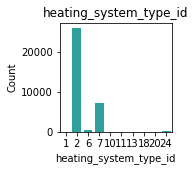

    heating_system_type_id  Count  Percent
2                        2  25863    76.67
7                        7   7132    21.14
6                        6    387     1.15
24                      24    255     0.76
20                      20     55     0.16
13                      13     24     0.07
18                      18      8     0.02
1                        1      7     0.02
10                      11      2     0.01
11                      10      1     0.00
_________________________________________________________________


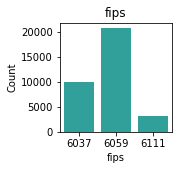

      fips  Count  Percent
6037  6059  20727    61.44
6059  6037   9897    29.34
6111  6111   3110     9.22
_________________________________________________________________


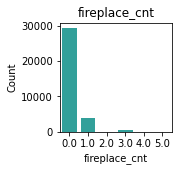

     fireplace_cnt  Count  Percent
0.0            0.0  29245    86.69
1.0            1.0   3898    11.56
2.0            3.0    494     1.46
3.0            2.0     91     0.27
4.0            5.0      5     0.01
5.0            4.0      1     0.00
_________________________________________________________________


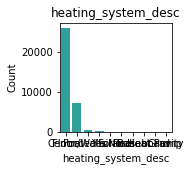

           heating_system_desc  Count  Percent
Central                Central  25863    76.67
Floor/Wall          Floor/Wall   7132    21.14
Forced air          Forced air    387     1.15
Yes                        Yes    255     0.76
Solar                    Solar     55     0.16
None                      None     24     0.07
Radiant                Radiant      8     0.02
Baseboard            Baseboard      7     0.02
Gravity              Heat Pump      2     0.01
Heat Pump              Gravity      1     0.00
_________________________________________________________________


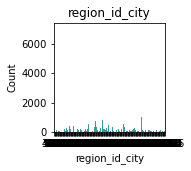

       region_id_city  Count  Percent
12447           37086   7077    20.98
46298           26964   1110     3.29
5534            52650    984     2.92
52650           30908    833     2.47
40227           12447    787     2.33
...               ...    ...      ...
53162           35216      1     0.00
6822            13232      1     0.00
40410           40410      1     0.00
38334           38334      1     0.00
10815            6822      1     0.00

[182 rows x 3 columns]
_________________________________________________________________


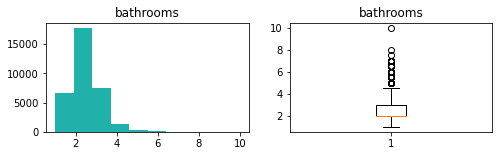

count    33734.000000
mean         2.212175
std          0.846383
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


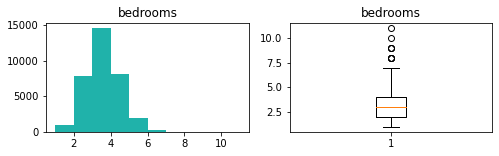

count    33734.000000
mean         3.090206
std          0.948383
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


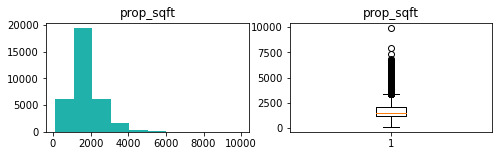

count    33734.000000
mean      1726.579089
std        757.854572
min        128.000000
25%       1204.000000
50%       1541.000000
75%       2069.000000
max       9918.000000
Name: prop_sqft, dtype: float64


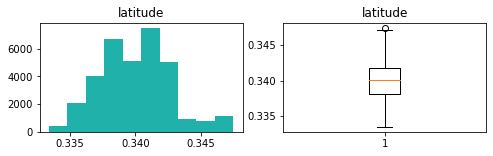

count    33734.000000
mean         0.340027
std          0.002704
min          0.333412
25%          0.338041
50%          0.340047
75%          0.341770
max          0.347466
Name: latitude, dtype: float64


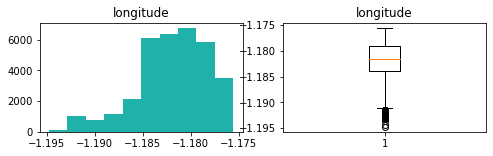

count    33734.000000
mean        -1.181903
std          0.003700
min         -1.194753
25%         -1.183970
50%         -1.181490
75%         -1.179113
max         -1.175546
Name: longitude, dtype: float64


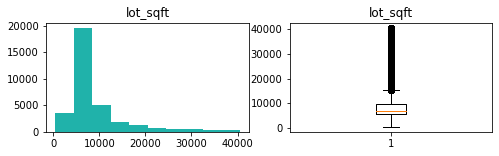

count    33734.000000
mean      9145.195263
std       6783.152272
min        435.000000
25%       5651.000000
50%       7011.000000
75%       9600.000000
max      40488.000000
Name: lot_sqft, dtype: float64


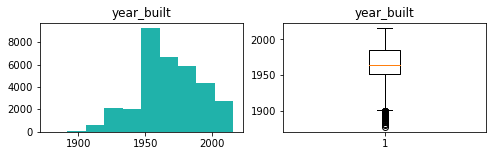

count    33734.000000
mean      1967.245420
std         23.427022
min       1878.000000
25%       1952.000000
50%       1965.000000
75%       1986.000000
max       2016.000000
Name: year_built, dtype: float64


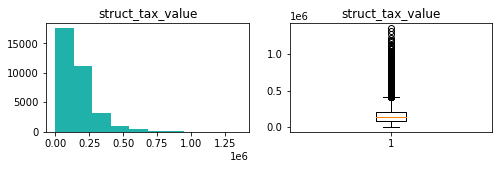

count    3.373400e+04
mean     1.643714e+05
std      1.269579e+05
min      1.290000e+02
25%      7.998000e+04
50%      1.310995e+05
75%      2.101535e+05
max      1.359419e+06
Name: struct_tax_value, dtype: float64


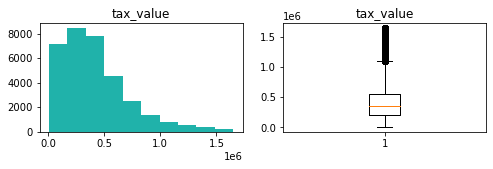

count    3.373400e+04
mean     4.213051e+05
std      3.031232e+05
min      9.242000e+03
25%      1.995482e+05
50%      3.623555e+05
75%      5.590000e+05
max      1.650432e+06
Name: tax_value, dtype: float64


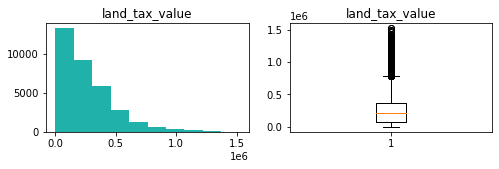

count    3.373400e+04
mean     2.569337e+05
std      2.223007e+05
min      1.217000e+03
25%      8.092200e+04
50%      2.080000e+05
75%      3.637230e+05
max      1.522954e+06
Name: land_tax_value, dtype: float64


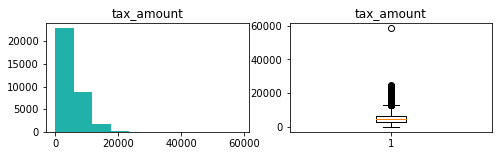

count    33734.000000
mean      5185.569332
std       3565.433491
min         61.820000
25%       2646.430000
50%       4460.020000
75%       6724.242500
max      58634.770000
Name: tax_amount, dtype: float64


In [13]:
ex.explore_univariate(train, categorical_vars, quant_vars)